In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!pip install tensorflow

In [ ]:
import numpy as np
import pandas as pd
import tensorflow as tf
import cv2
from tensorflow import keras
from keras import Sequential
from keras.layers import Dense, MaxPool2D, Conv2D, Flatten, BatchNormalization, Dropout, GlobalAveragePooling2D
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import os
import glob

In [ ]:
train_path = "/content/drive/MyDrive/chest_xray/train"
test_path = "/content/drive/MyDrive/chest_xray/test"

train_path_normal = os.path.join(train_path, 'NORMAL')
test_path_normal = os.path.join(test_path, 'NORMAL')

train_path_pneumonia = os.path.join(train_path, 'PNEUMONIA')
test_path_pneumonia = os.path.join(test_path, 'PNEUMONIA')

In [ ]:
print('Number of images in train and test data')
print(f"Number of images in train normal data - {len(os.listdir(train_path_normal))}")
print(f"Number of images in train pneumonia data - {len(os.listdir(train_path_pneumonia))}")
print(f"Number of images in test normal data - {len(os.listdir(test_path_normal))}")
print(f"Number of images in test pneumonia data - {len(os.listdir(test_path_pneumonia))}")

Number of images in train and test data
Number of images in train normal data - 3883
Number of images in train pneumonia data - 3883
Number of images in test normal data - 234
Number of images in test pneumonia data - 390


Normal Images
Shape of Normal image result337.png - (800, 800, 3)
Shape of Normal image result1397.png - (800, 800, 3)
Shape of Normal image result661.png - (800, 800, 3)
Shape of Normal image result1495.png - (800, 800, 3)
Shape of Normal image result924.png - (800, 800, 3)


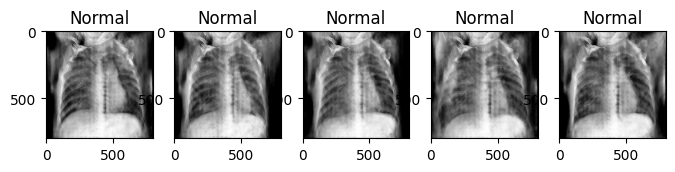

Pneumonia Images
Shape of Pneumonia image person370_bacteria_1687.jpeg - (688, 1072, 3)
Shape of Pneumonia image person1472_bacteria_3833.jpeg - (1104, 1456, 3)
Shape of Pneumonia image person575_bacteria_2374.jpeg - (755, 1244, 3)
Shape of Pneumonia image person308_bacteria_1445.jpeg - (771, 1280, 3)
Shape of Pneumonia image person1420_bacteria_3647.jpeg - (808, 944, 3)


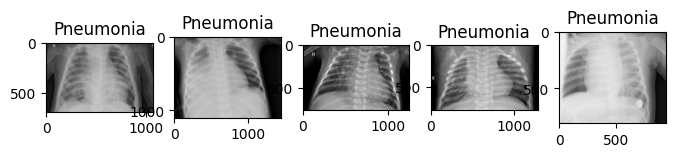

In [ ]:
normal_images = np.random.choice(os.listdir(train_path_normal), 5, replace = False)
pneumonia_images = np.random.choice(os.listdir(train_path_pneumonia), 5, replace = False)

print('Normal Images')
fig, axes = plt.subplots(1,5, figsize = (8,8))
for i in range(len(normal_images)):
    plt.subplot(1,5, i+1)
    img = cv2.imread(os.path.join(train_path_normal, normal_images[i]))
    print(f'Shape of Normal image {normal_images[i]} - {img.shape}')
    plt.imshow(img, cmap = 'gray')
    plt.title('Normal')
plt.show()

#-------------------------------------------------------------------------

print('Pneumonia Images')
fig, axes = plt.subplots(1,5, figsize = (8,8))
for i in range(len(pneumonia_images)):
    plt.subplot(1,5, i+1)
    img = cv2.imread(os.path.join(train_path_pneumonia, pneumonia_images[i]))
    print(f'Shape of Pneumonia image {pneumonia_images[i]} - {img.shape}')
    plt.imshow(img, cmap = 'gray')
    plt.title('Pneumonia')
plt.show()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255, validation_split=0.20)
test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
training_set = train_datagen.flow_from_directory(directory = train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset='training',
                                                 shuffle=True,
                                                 seed=69)

valid_set = train_datagen.flow_from_directory(directory = train_path,
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary',
                                                 subset='validation',
                                                 shuffle=True,
                                                 seed=69)


test_set = test_datagen.flow_from_directory(directory = test_path,
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary',
                                            shuffle = False,
                                            seed = 69)

Found 6214 images belonging to 2 classes.
Found 1552 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


# VGG16 | CNN model


---



In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.applications import VGG16

In [ ]:
vgg_base=VGG16(weights="imagenet",
                include_top=False,
                input_shape=(64,64,3))

vgg_base.trainable=False
for layers in vgg_base.layers:
    layers.trainable = False
vgg_base.summary()

model=Sequential()
model.add(vgg_base)
#model.add(Flatten())
model.add(GlobalAveragePooling2D())
model.add(Dense(265,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(120,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(64, activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.summary()

Model: "vgg16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 64, 64, 3)]       0         
                                                                 
 block1_conv1 (Conv2D)       (None, 64, 64, 64)        1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 64, 64, 64)        36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 32, 32, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 32, 32, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 32, 32, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 16, 16, 128)       0     

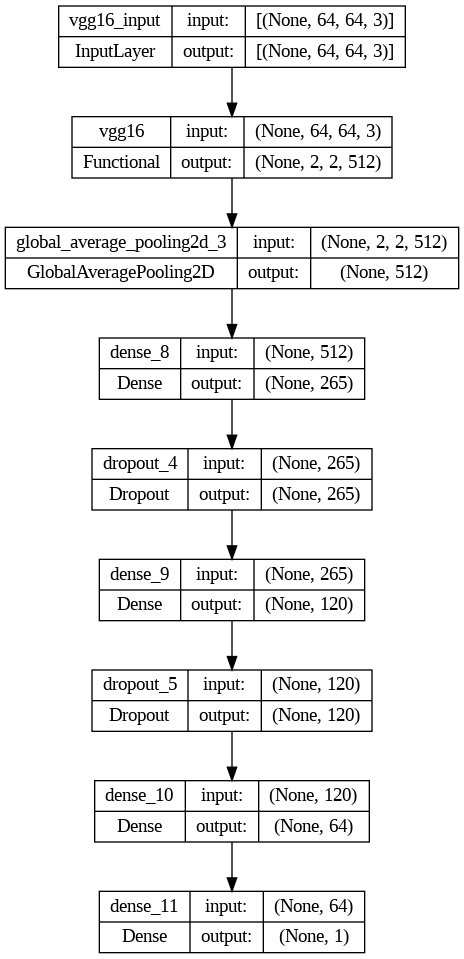

In [ ]:
from tensorflow.keras.utils import plot_model

# Assuming model is your trained model

# Plot the model architecture and save it as PNG
plot_model(model, to_file='model_architecture.png', show_shapes=True, show_layer_names=True)

# Display the saved PNG image
from IPython.display import Image
Image(filename='model_architecture.png')


In [ ]:
adam_opt = keras.optimizers.Adam(learning_rate = 0.00001)

In [ ]:
model.compile(optimizer=adam_opt,
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Earlystopping
callback = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss',
                                            restore_best_weights=True,
                                            patience = 5)

# Include the epoch in the file name (uses `str.format`)
checkpoint_path = "/content/drive/MyDrive/chest_xray/trainingmodel_save_cp-{epoch:04d}.ckpt"
checkpoint_dir = os.path.dirname(checkpoint_path)

batch_size = 32

# Calculate the number of batches per epoch
import math
n_batches = len(training_set) / batch_size
n_batches = math.ceil(n_batches)    # round up the number of batches to the nearest whole integer

# Create a callback that saves the model's weights every 5 epochs
cp_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_path,
    verbose=1,
    save_weights_only=True,
    save_freq=5*n_batches)


Epoch 1/10
 34/195 [====>.........................] - ETA: 7:44 - loss: 0.6845 - accuracy: 0.5460
Epoch 1: saving model to /content/drive/MyDrive/chest_xray/trainingmodel_save_cp-0001.ckpt
 69/195 [=========>....................] - ETA: 6:02 - loss: 0.6751 - accuracy: 0.5779
Epoch 1: saving model to /content/drive/MyDrive/chest_xray/trainingmodel_save_cp-0001.ckpt
104/195 [===============>..............] - ETA: 4:21 - loss: 0.6689 - accuracy: 0.6013
Epoch 1: saving model to /content/drive/MyDrive/chest_xray/trainingmodel_save_cp-0001.ckpt
139/195 [====================>.........] - ETA: 2:37 - loss: 0.6625 - accuracy: 0.6237
Epoch 1: saving model to /content/drive/MyDrive/chest_xray/trainingmodel_save_cp-0001.ckpt
174/195 [=========================>....] - ETA: 58s - loss: 0.6550 - accuracy: 0.6467 
Epoch 1: saving model to /content/drive/MyDrive/chest_xray/trainingmodel_save_cp-0001.ckpt
195/195 [==============================] - 684s 4s/step - loss: 0.6505 - accuracy: 0.6593 - val_los

<Axes: >

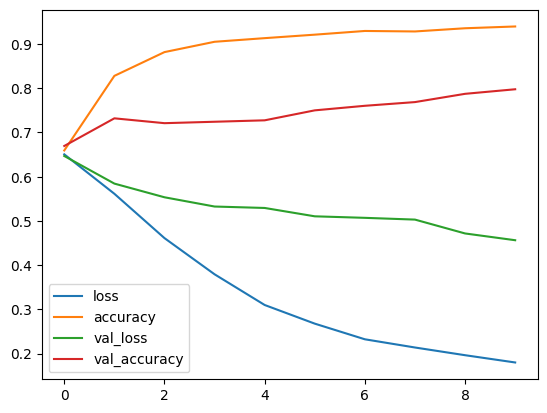

In [ ]:
# Save the weights using the `checkpoint_path` format
model.save_weights(checkpoint_path.format(epoch=0))

history = model.fit(training_set,
                    epochs=10,
                    steps_per_epoch=len(training_set),
                    validation_data = valid_set,
                    callbacks = [callback,cp_callback])

history_df = pd.DataFrame(history.history)

history_df.plot()

## Save and Load the Model

After training, it's essential to save the model weights to avoid retraining in the future.


In [ ]:
model.save('/content/drive/MyDrive/chest_xray/models/vgg16_model.h5')

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
#from tensorflow.keras.models import load_model
#models = load_model("/content/drive/MyDrive/chest_xray/models/vgg16_model.h5")

In [ ]:
model.evaluate(test_set)

20/20 [==============================] - 129s 7s/step - loss: 0.4924 - accuracy: 0.7949


[0.49238714575767517, 0.7948718070983887]

In [ ]:
pred = model.predict(test_set,verbose = 1)

20/20 [==============================] - 36s 2s/step


In [ ]:
pred1 = np.where(pred>0.5, 1, 0)

Classification Report for the model VGG16:
              precision    recall  f1-score   support

           0       0.68      0.85      0.76       234
           1       0.90      0.76      0.82       390

    accuracy                           0.79       624
   macro avg       0.79      0.81      0.79       624
weighted avg       0.81      0.79      0.80       624

Accuracy Score: 0.7932692307692307
Precision Score: 0.8966565349544073


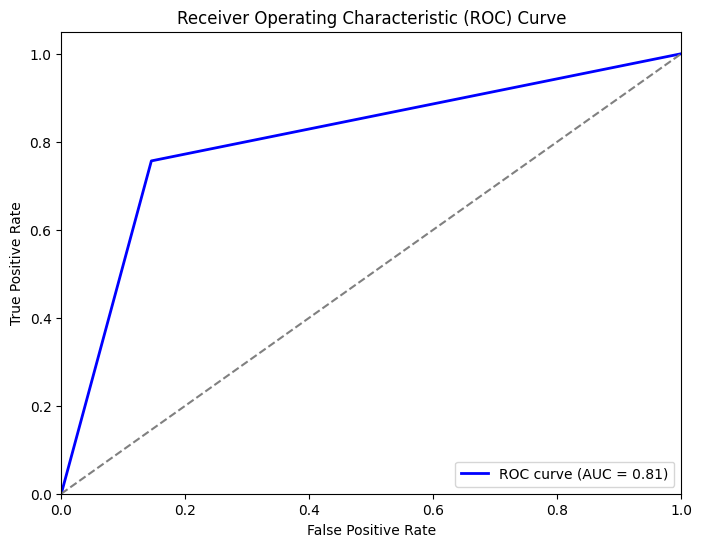

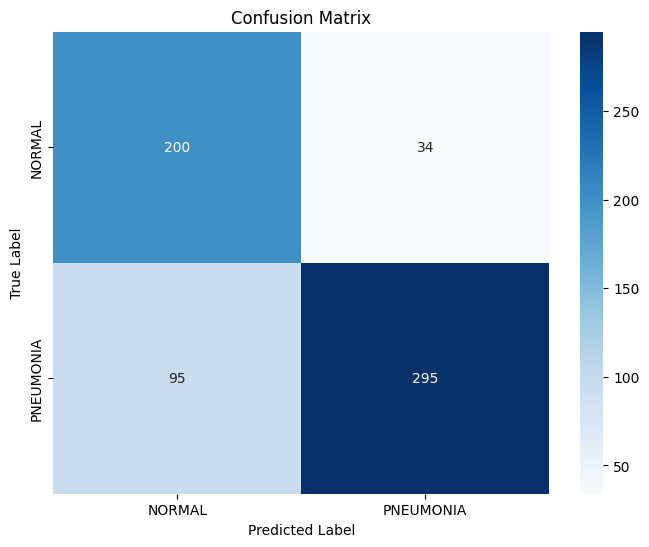

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, precision_score, mean_squared_error, roc_curve, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

class_report = classification_report(test_set.classes, pred1)
class_matrix = confusion_matrix(test_set.classes, pred1)
print(f'Classification Report for the model VGG16:\n{class_report}')
print(f'Accuracy Score: {accuracy_score(test_set.classes, pred1)}')
print(f'Precision Score: {precision_score(test_set.classes, pred1)}')

# Compute ROC curve and AUC
fpr, tpr, thresholds = roc_curve(test_set.classes, pred1, pos_label=1)
roc_auc = roc_auc_score(test_set.classes, pred1)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (AUC = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

# Plot confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(class_matrix, annot=True, fmt='d', cmap='Blues',
            xticklabels=test_set.class_indices.keys(),
            yticklabels=test_set.class_indices.keys())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()
